# Classification Evaluation Metrics


Here we are specifically talking about binary classification. but the concepts mentioned can be applied to multiclass classification also.

## References 

- https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers
- https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             precision_recall_curve, roc_auc_score, roc_curve,
                             RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix,
                             f1_score, PrecisionRecallDisplay, auc)

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [3]:
mat_x, mat_y = make_classification(n_samples=1000)

mat_x.shape, mat_y.shape

((1000, 20), (1000,))

In [4]:
estimator = LogisticRegression()
estimator.fit(mat_x, mat_y)
pred_y = estimator.predict(mat_x)

## Condition Positive

The number of real positive cases in the data.

## Condition Negative

The number of real negative cases in the data.

## Confusion Matrix


|| Predicted Values | Positive | Negative |
|-|-|-|-|
| Actual | Positive | True Positive(TP) | False Negative(FN) |
| Values | Negative | False Positive(FP) | True Negative(TN) |

In [5]:
confusion_mat = confusion_matrix(mat_y, pred_y)
confusion_mat

array([[432,  70],
       [ 72, 426]])

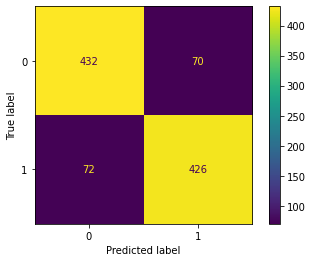

In [6]:
ConfusionMatrixDisplay(confusion_mat).plot()
plt.show()

In [7]:
tn, fp, fn, tp = confusion_mat.ravel()
tn, fp, fn, tp

(432, 70, 72, 426)

## Accuracy

\begin{align}
    accuracy &= \frac{TP + TN}{TP + FP + TN + FN}
\end{align}

In [14]:
accuracy_score(mat_y, pred_y)

0.858

In [15]:
(tp + tn) / (tp + fp + tn + fn)

0.858

## Precision 

\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}

In [16]:
precision_score(mat_y, pred_y, pos_label=1)

0.8588709677419355

In [17]:
tp / (tp + fp)

0.8588709677419355

In [18]:
precision_score(mat_y, pred_y, pos_label=0)

0.8571428571428571

In [19]:
tn / (tn + fn)

0.8571428571428571

## Recall / Sensitivity / True Positive Rate (TPR)

\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}

In [20]:
recall_score(mat_y, pred_y, pos_label=1)

0.8554216867469879

In [21]:
tp / (tp + fn)

0.8554216867469879

In [22]:
recall_score(mat_y, pred_y, pos_label=0)

0.8605577689243028

In [23]:
tn / (tn + fp)

0.8605577689243028

## Specificity / Selectvity / True Negative Rate (TNR)

\begin{align}
    specificity &= \frac{TN}{TN + FP}
\end{align}

In [33]:
tn/ (tn + fp)

0.8605577689243028

## Fall out / False Positive Rate (FPR)

\begin{align}
    FPR = \frac{FP}{FP + TN}
\end{align}

In [24]:
fp / (fp + tn)

0.1394422310756972

## Miss rate / False Negative Rate (FNR)

\begin{align}
    FNR = \frac{FN}{FN + TP}
\end{align}

In [34]:
fn / (fn + tp)

0.14457831325301204

## F1-score

\begin{align}
    F1 &= \frac{2}{\frac{1}{P} + \frac{1}{R}}\\
    F1 &= \frac{2  P  R}{P + R}\\
    F1 &= \frac{2 TP}{2TP + FP + FN}
\end{align}

In [25]:
f1_score(mat_y, pred_y, pos_label=1)

0.8571428571428571

In [26]:
f1_score(mat_y, pred_y, pos_label=0)

0.8588469184890656

## PRC (Precision-Recall Curve)

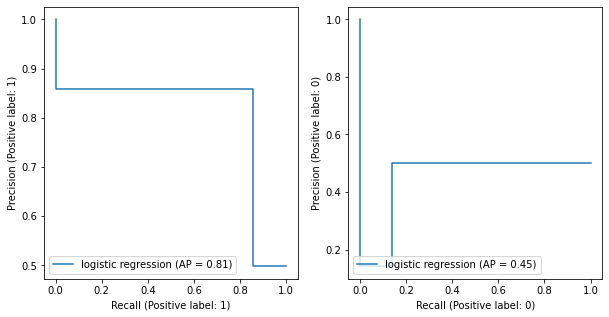

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

PrecisionRecallDisplay.from_predictions(mat_y, pred_y, name='logistic regression', pos_label=1, ax=ax[0])
PrecisionRecallDisplay.from_predictions(mat_y, pred_y, name='logistic regression', pos_label=0, ax=ax[1])

plt.show()

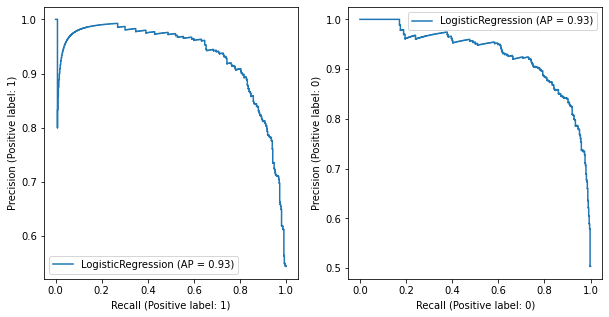

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

PrecisionRecallDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[0])
PrecisionRecallDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=0, ax=ax[1])

plt.legend(loc='best')
plt.show()

In [29]:
precision, recall, threshold = precision_recall_curve(y_true=mat_y, probas_pred=pred_y,
                                                      pos_label=1)

auc(recall, precision)

0.8931463272444617

In [30]:
precision, recall, threshold = precision_recall_curve(y_true=mat_y, probas_pred=pred_y,
                                                      pos_label=0)

auc(recall, precision)

0.3562856316668808

## ROC (Receiver Operating Characteristic Curve)

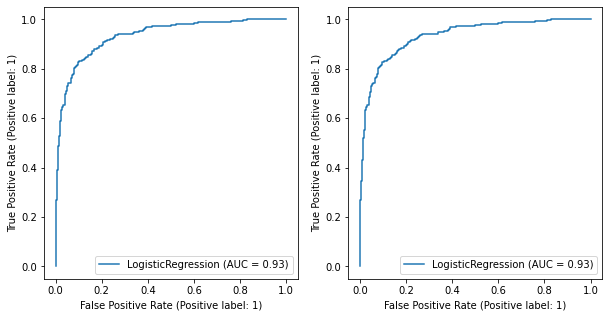

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

RocCurveDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[0])
RocCurveDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[1])

plt.legend(loc='best')
plt.show()


In [32]:
roc_auc_score(mat_y, pred_y)

0.8579897278356453